In [23]:
import pandas as pd 
import numpy as np
from IPython.display import display 
import matplotlib.pyplot as plt

In [24]:
kd = pd.read_excel('D:/上課內容/研究室/川崎症/database/KD-CBCWBC-datafor-成大(origin).xlsx')
fc = pd.read_excel('D:/上課內容/研究室/川崎症/database/fever-CBCWBC-datafor-成大(origin).xlsx')

In [25]:
eos = list(kd['eosinophil count '])
eosp = list(kd['eosinophil (%)'])
eosz = list(kd['EOS \nz score'])

eos0 = list(fc['eosinophil count '])
eosp0 = list(fc['eosinophil (%)'])
eosz0 = list(fc['EOS z score'])

In [56]:
count = 0
for i in eos0:
    if i < 1500:
        count +=1 


21067


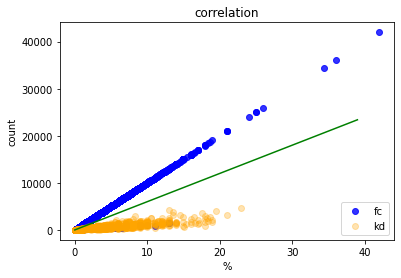

In [27]:
#linear model
x = [i for i in range(40)]
y = [i*600 for i in range(40)]
# % -count
fig = plt.subplot()
plt.scatter(eosp0,eos0,color = 'blue',alpha = 0.8,label ='fc')
plt.scatter(eosp,eos,color = 'orange',alpha = 0.3,label='kd')
plt.plot(x,y,color = 'green')
plt.title('correlation')
plt.xlabel('%')
plt.ylabel("count")
plt.legend(loc="lower right")
plt.show()

In [28]:
y0_train_out = list(map(lambda x,y: y>x*600,eosp0,eos0))
y1_train_out = list(map(lambda x,y: y<x*600,eosp,eos))
True_neg = 0
False_pos = 0
True_pos = 0
False_neg = 0
for i in y0_train_out:
    if i == True:
        True_neg += 1
    elif i == False:
        False_pos += 1
for i in y1_train_out:
    if i == True:
        True_pos +=1
    elif i == False:
        False_neg +=1 
confusion = pd.DataFrame(columns = ['predict \ real','negative','positive'])
confusion['negative'] = [True_neg,False_pos]
confusion['positive'] = [False_neg,True_pos]
confusion['predict \ real'] = ['negative','positive']
confusion.set_index('predict \ real',inplace=True)
recall = (True_pos/(True_pos+False_neg))
precision = (True_pos/(True_pos+False_pos))

display(confusion)
print('recall:',recall)
print('precision:',precision)

,negative,positive
predict \ real,,
negative,64502,467
positive,38299,2437


recall: 0.8391873278236914
precision: 0.059824234092694425


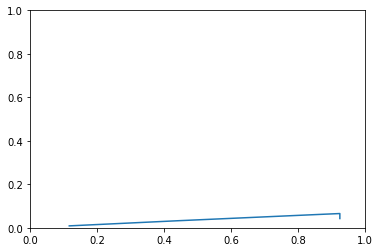

In [29]:
recall_list = []
precision_list = []
for i in range(0,1000,100):
    y0_train_out = list(map(lambda x,y: y>x*i+50,eosp0,eos0))
    y1_train_out = list(map(lambda x,y: y<x*i+50,eosp,eos))
    True_neg = 0
    False_pos = 0
    True_pos = 0
    False_neg = 0
    for i in y0_train_out:
        if i == True:
            True_neg += 1
        elif i == False:
            False_pos += 1
    for i in y1_train_out:
        if i == True:
            True_pos +=1
        elif i == False:
            False_neg +=1 
    confusion = pd.DataFrame(columns = ['predict \ real','negative','positive'])
    confusion['negative'] = [True_neg,False_pos]
    confusion['positive'] = [False_neg,True_pos]
    confusion['predict \ real'] = ['negative','positive']
    confusion.set_index('predict \ real',inplace=True)
    recall = (True_pos/(True_pos+False_neg))
    precision = (True_pos/(True_pos+False_pos))
    recall_list.append(recall)
    precision_list.append(precision)
# display(confusion)
# print('recall:',recall)
# print('precision:',precision)
fig = plt.subplot()
plt.plot(recall_list,precision_list)
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

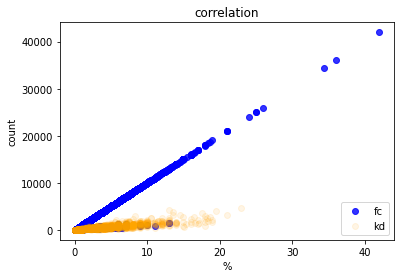

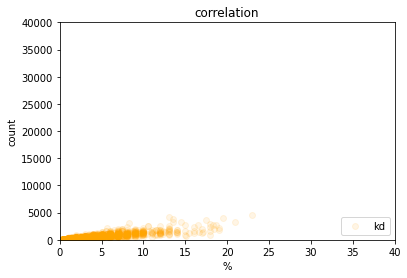

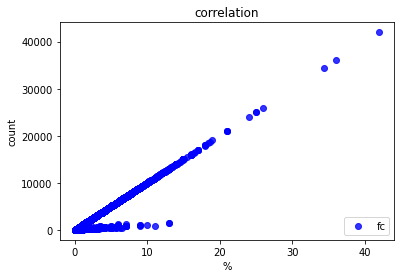

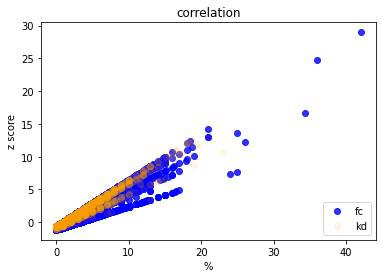

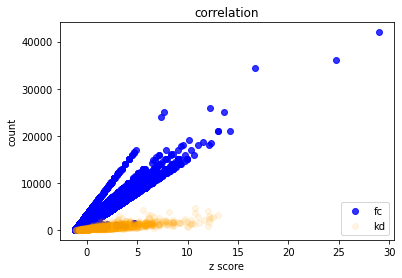

In [30]:
# % -count
fig = plt.subplot()
plt.scatter(eosp0,eos0,color = 'blue',alpha = 0.8,label ='fc')
plt.scatter(eosp,eos,color = 'orange',alpha = 0.1,label='kd')
plt.title('correlation')
plt.xlabel('%')
plt.ylabel("count")
plt.legend(loc="lower right")
plt.show()
plt.scatter(eosp,eos,color = 'orange',alpha = 0.1,label='kd')
plt.title('correlation')
plt.xlabel('%')
plt.ylabel("count")
plt.xlim([0,40])
plt.ylim([0,40000])
plt.legend(loc="lower right")
plt.show()
plt.scatter(eosp0,eos0,color = 'blue',alpha = 0.8,label ='fc')
plt.title('correlation')
plt.xlabel('%')
plt.ylabel("count")
plt.legend(loc="lower right")
plt.show()
# % - z score
fig = plt.subplot()
plt.scatter(eosp0,eosz0,color = 'blue',alpha = 0.8,label ='fc')
plt.scatter(eosp,eosz,color = 'orange',alpha = 0.1,label='kd')
plt.title('correlation')
plt.xlabel('%')
plt.ylabel("z score")
plt.legend(loc="lower right")
plt.show()
# count - z score
fig = plt.subplot()
plt.scatter(eosz0,eos0,color = 'blue',alpha = 0.8,label ='fc')
plt.scatter(eosz,eos,color = 'orange',alpha = 0.1,label='kd')
plt.title('correlation')
plt.xlabel('z score')
plt.ylabel("count")
plt.legend(loc="lower right")
plt.show()


#blue => fc
#orange => kd

In [31]:
lym = list(kd['Lym count '])
lymp = list(kd['Lym (%)'])

lym0 = list(fc['Lym count '])
lymp0 = list(fc['Lym (%)'])

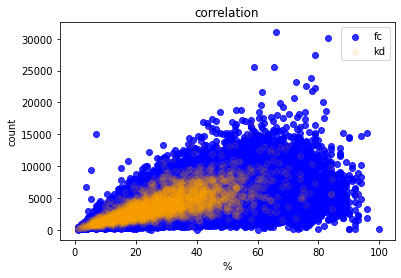

In [32]:
#lym
# % -count
fig = plt.subplot()
plt.scatter(lymp0,lym0,color = 'blue',alpha = 0.8,label ='fc')
plt.scatter(lymp,lym,color = 'orange',alpha = 0.1,label='kd')
plt.title('correlation')
plt.xlabel('%')
plt.ylabel("count")
plt.legend(loc="upper right")
plt.show()

In [33]:
seg = list(kd['Seg count '])
segp = list(kd['Seg (%)'])

seg0 = list(fc['Seg count '])
segp0 = list(fc['Seg (%)'])

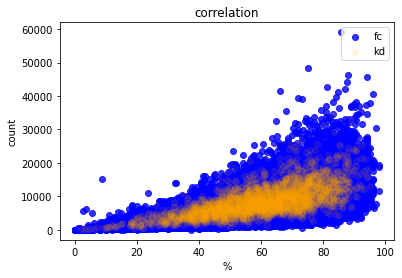

In [34]:
#seg
# % -count
fig = plt.subplot()
plt.scatter(segp0,seg0,color = 'blue',alpha = 0.8,label ='fc')
plt.scatter(segp,seg,color = 'orange',alpha = 0.1,label='kd')
plt.title('correlation')
plt.xlabel('%')
plt.ylabel("count")
plt.legend(loc="upper right")
plt.show()

In [35]:
bas = list(kd['basophil count '])
basp = list(kd['basophil (%)'])

bas0 = list(fc['basophil count '])
basp0 = list(fc['basophil (%)'])

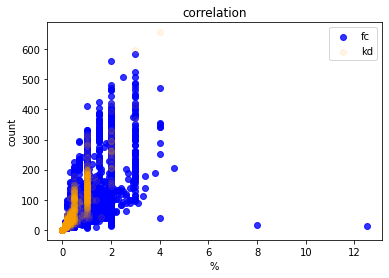

In [36]:
#bas
# % -count
fig = plt.subplot()
plt.scatter(basp0,bas0,color = 'blue',alpha = 0.8,label ='fc')
plt.scatter(basp,bas,color = 'orange',alpha = 0.1,label='kd')
plt.title('correlation')
plt.xlabel('%')
plt.ylabel("count")
plt.legend(loc="upper right")
plt.show()